In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
data = np.loadtxt('D:\\Coding\\AI-and-Data-Analytics-course-repo\\Datasets\\housing.xls')
df=pd.DataFrame(data,columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

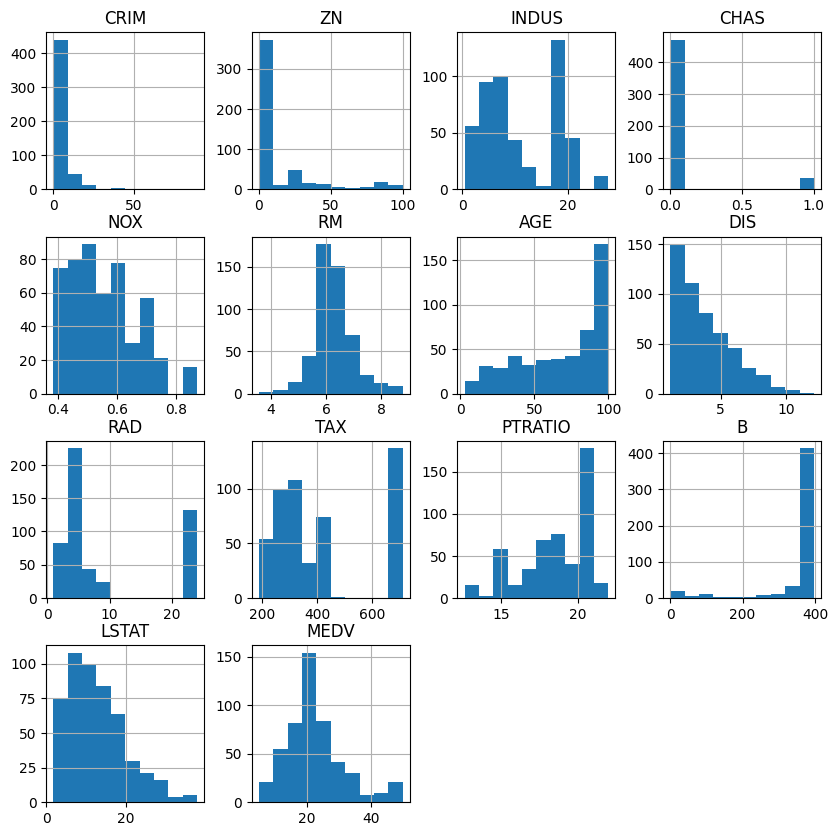

In [5]:
df.hist(figsize=(10,10))

In [6]:
X=df.drop("MEDV",axis=1)
Y=df["MEDV"]

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [11]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_predictions = linear_model.predict(X_test)

In [20]:
# SVM with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, Y_train)
svr_predictions = svr_model.predict(X_test)

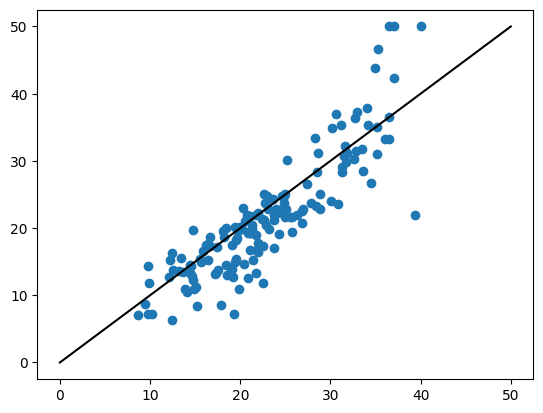

In [13]:
x=np.linspace(0,50,1000)
plt.scatter(linear_model.predict(X_test),Y_test)
plt.plot(x,x,color="black")

In [21]:
# Evaluation Metrics Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print("-" * 30)
    return mae, mse, r2

In [24]:
# Evaluate Linear Regression
evaluate_model(Y_test, linear_predictions, "Linear Regression")

# Evaluate SVM
evaluate_model(Y_test, svr_predictions, "SVM with RBF Kernel")

Linear Regression Performance:
Mean Absolute Error (MAE): 3.3541319443845623
Mean Squared Error (MSE): 20.379628212200192
R² Score: 0.7413389607075056
------------------------------
SVM with RBF Kernel Performance:
Mean Absolute Error (MAE): 5.362696081506068
Mean Squared Error (MSE): 57.301238320485425
R² Score: 0.2727248160567144
------------------------------


(np.float64(5.362696081506068),
 np.float64(57.301238320485425),
 0.2727248160567144)

In [25]:
# Visualizing Predictions
x = np.linspace(0, 50, 1000)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

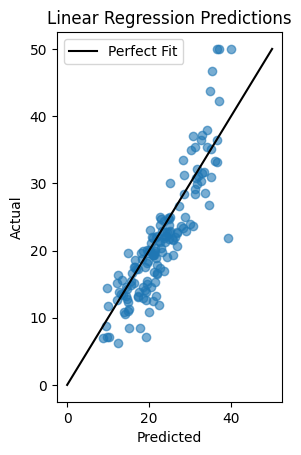

In [26]:
# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(linear_predictions, Y_test, alpha=0.6)
plt.plot(x, x, color="black", label="Perfect Fit")
plt.title("Linear Regression Predictions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.legend()

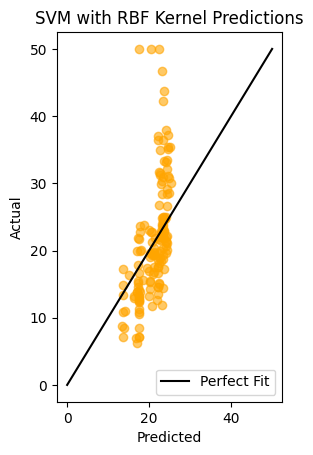

In [27]:
# SVM Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(svr_predictions, Y_test, alpha=0.6, color="orange")
plt.plot(x, x, color="black", label="Perfect Fit")
plt.title("SVM with RBF Kernel Predictions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.legend()

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>